In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn

In [331]:
c_df = pd.read_csv('./covid-19-data/us-counties.csv')
s_df = pd.read_csv('./covid-19-data/us-states.csv')
h_df = pd.read_csv('./covid-19-data/state_shelter.csv')
p_df = pd.read_csv('./covid-19-data/state_population.csv')

In [332]:
c_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [333]:
h_df.head()

,date,state
0,2020-03-19,California
1,2020-03-21,Illinois
2,2020-03-21,New Jersey
3,2020-03-22,New York
4,2020-03-22,Ohio


In [334]:
p_df.head()

,state,pop,density
0,Alabama,4908621,96.9221
1,Alaska,734002,1.2863
2,Arizona,7378494,64.9550
3,Arkansas,3038999,58.4030
4,California,39937489,256.3727


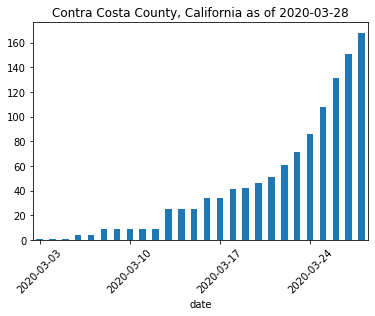

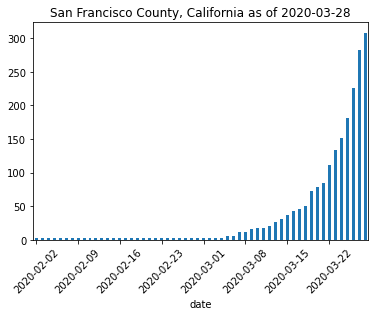

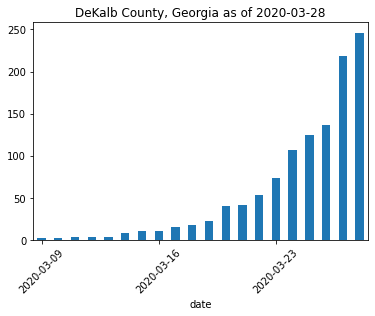

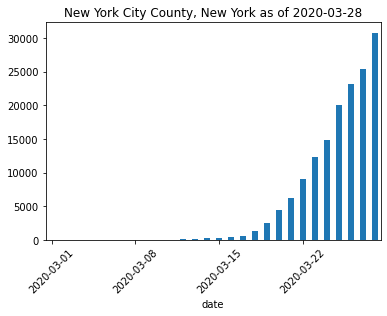

In [335]:
def plot_accum_county_cases(county, state):
    df = c_df[(c_df["county"] == county) & (c_df["state"] == state)][['date','cases']].reset_index().drop(columns='index')
    ax = df.plot(kind='bar',x='date', y='cases')
    ax.get_legend().remove()
    _x = numpy.arange(df.date.size)
    plt.xticks(_x[::7], list(df.date)[::7], rotation=45)
    plt.title(county + ' County, ' + state + ' as of ' + max(df.date))
    
plot_accum_county_cases('Contra Costa', 'California')
plot_accum_county_cases('San Francisco', 'California')
plot_accum_county_cases('DeKalb','Georgia')
plot_accum_county_cases('New York City','New York')


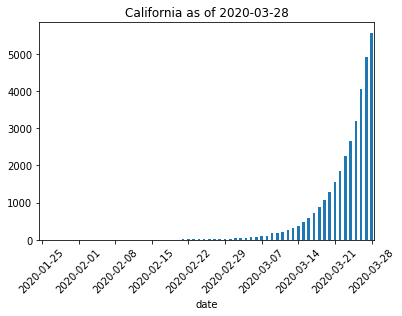

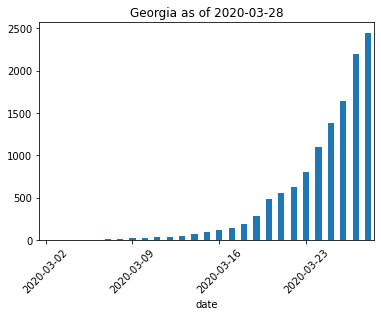

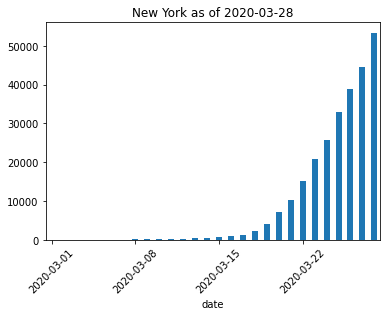

In [336]:
def plot_accum_state_cases(state):
    df = s_df[s_df["state"] == state][['date','cases']].reset_index().drop(columns='index')
    ax = df.plot(kind='bar',x='date', y='cases')
    ax.get_legend().remove()
    _x = numpy.arange(df.date.size)
    plt.xticks(_x[::7], list(df.date)[::7], rotation=45)
    plt.xticks(rotation=45)
    plt.title(state + " as of " + max(df.date))
    
plot_accum_state_cases('California')
plot_accum_state_cases('Georgia')
plot_accum_state_cases('New York')

In [337]:
def plot_accum_state_cases(state):
    df = s_df[s_df["state"] == state][['date','cases']].reset_index().drop(columns='index')
    ax = df.plot(kind='bar',x='date', y='cases')
    ax.get_legend().remove()
    _x = numpy.arange(df.date.size)
    matplotlib.pyplot.xticks(_x[::7], list(df.date)[::7], rotation=45)
    matplotlib.pyplot.xticks(rotation=45)
    matplotlib.pyplot.title(state + " as of " + max(df.date))

In [339]:
state_m_df = pandas.merge(p_df, h_df, left_on='state', right_on='state')
state_m_df['shelter_date'] = state_m_df['date']
state_m_df = state_m_df.drop(columns='date')

In [445]:
state_m_df.head()

,state,pop,density,shelter_date
0,Alaska,734002,1.2863,2020-03-28
1,California,39937489,256.3727,2020-03-19
2,Colorado,5845526,56.4011,2020-03-26
3,Connecticut,3563077,735.8689,2020-03-23
4,Delaware,982895,504.3073,2020-03-24


In [446]:
def plot_county_and_state(county, state, column='cases'):
    fig = plt.figure()
    f = plt.figure(figsize=(30,30))

    ax1 = f.add_subplot(221)
    df = s_df[s_df["state"] == state][['date','cases','deaths']].reset_index().drop(columns='index')
    ax1.bar(df.date, df[column])
    highlight_state_shelter_in_place(df, state, column, ax1)
    format_axes(ax1, df, column, state)

    ax2 = f.add_subplot(222)
    new_column = 'new_' + column
    df[new_column]=df[column].diff().fillna(0).astype('int')
    ax2.bar(df.date, df[new_column])
    highlight_state_shelter_in_place(df, state, new_column, ax2)
    format_axes(ax2, df, new_column, state)

    ax3 = f.add_subplot(223)
    df = c_df[(c_df["state"] == state) & (c_df["county"] == county)][['date','cases','deaths']].reset_index().drop(columns='index')
    ax3.bar(df.date, df[column])
    highlight_state_shelter_in_place(df, state, column, ax3)
    format_axes(ax3, df, column, state, county)

    ax4 = f.add_subplot(224)
    new_column = 'new_' + column
    df[new_column]=df[column].diff().fillna(0).astype('int')
    ax4.bar(df.date, df[new_column])
    highlight_state_shelter_in_place(df, state, new_column, ax4)
    format_axes(ax4, df, new_column, state, county)
    
    plt.show()

def highlight_state_shelter_in_place(df, state, column, ax):
    try:
        df_highlight = df[df['date'] == state_m_df[state_m_df['state'] == state].shelter_date.values[0]]
        ax.bar(df_highlight.date, df_highlight[column], color='r')         
    except:
        pass
    
def format_axes(ax, df, column, state, county=None):
    _x = numpy.arange(df.date.size)
    freq = 5
    ax.set_xticks(_x[::freq])
    ax.set_xticklabels(list(df.date)[::freq], rotation=45)
    ax.tick_params(axis='both', which='major', labelsize=20)
    prefix = 'Total ' + column + ' '
    if column.startswith('new'):
        prefix = 'New ' + column[4:] + ' '
    if county:
        prefix += county + ", "
    ax.set_title(prefix + state + " as of " + max(df.date), fontsize=24)


<Figure size 432x288 with 0 Axes>

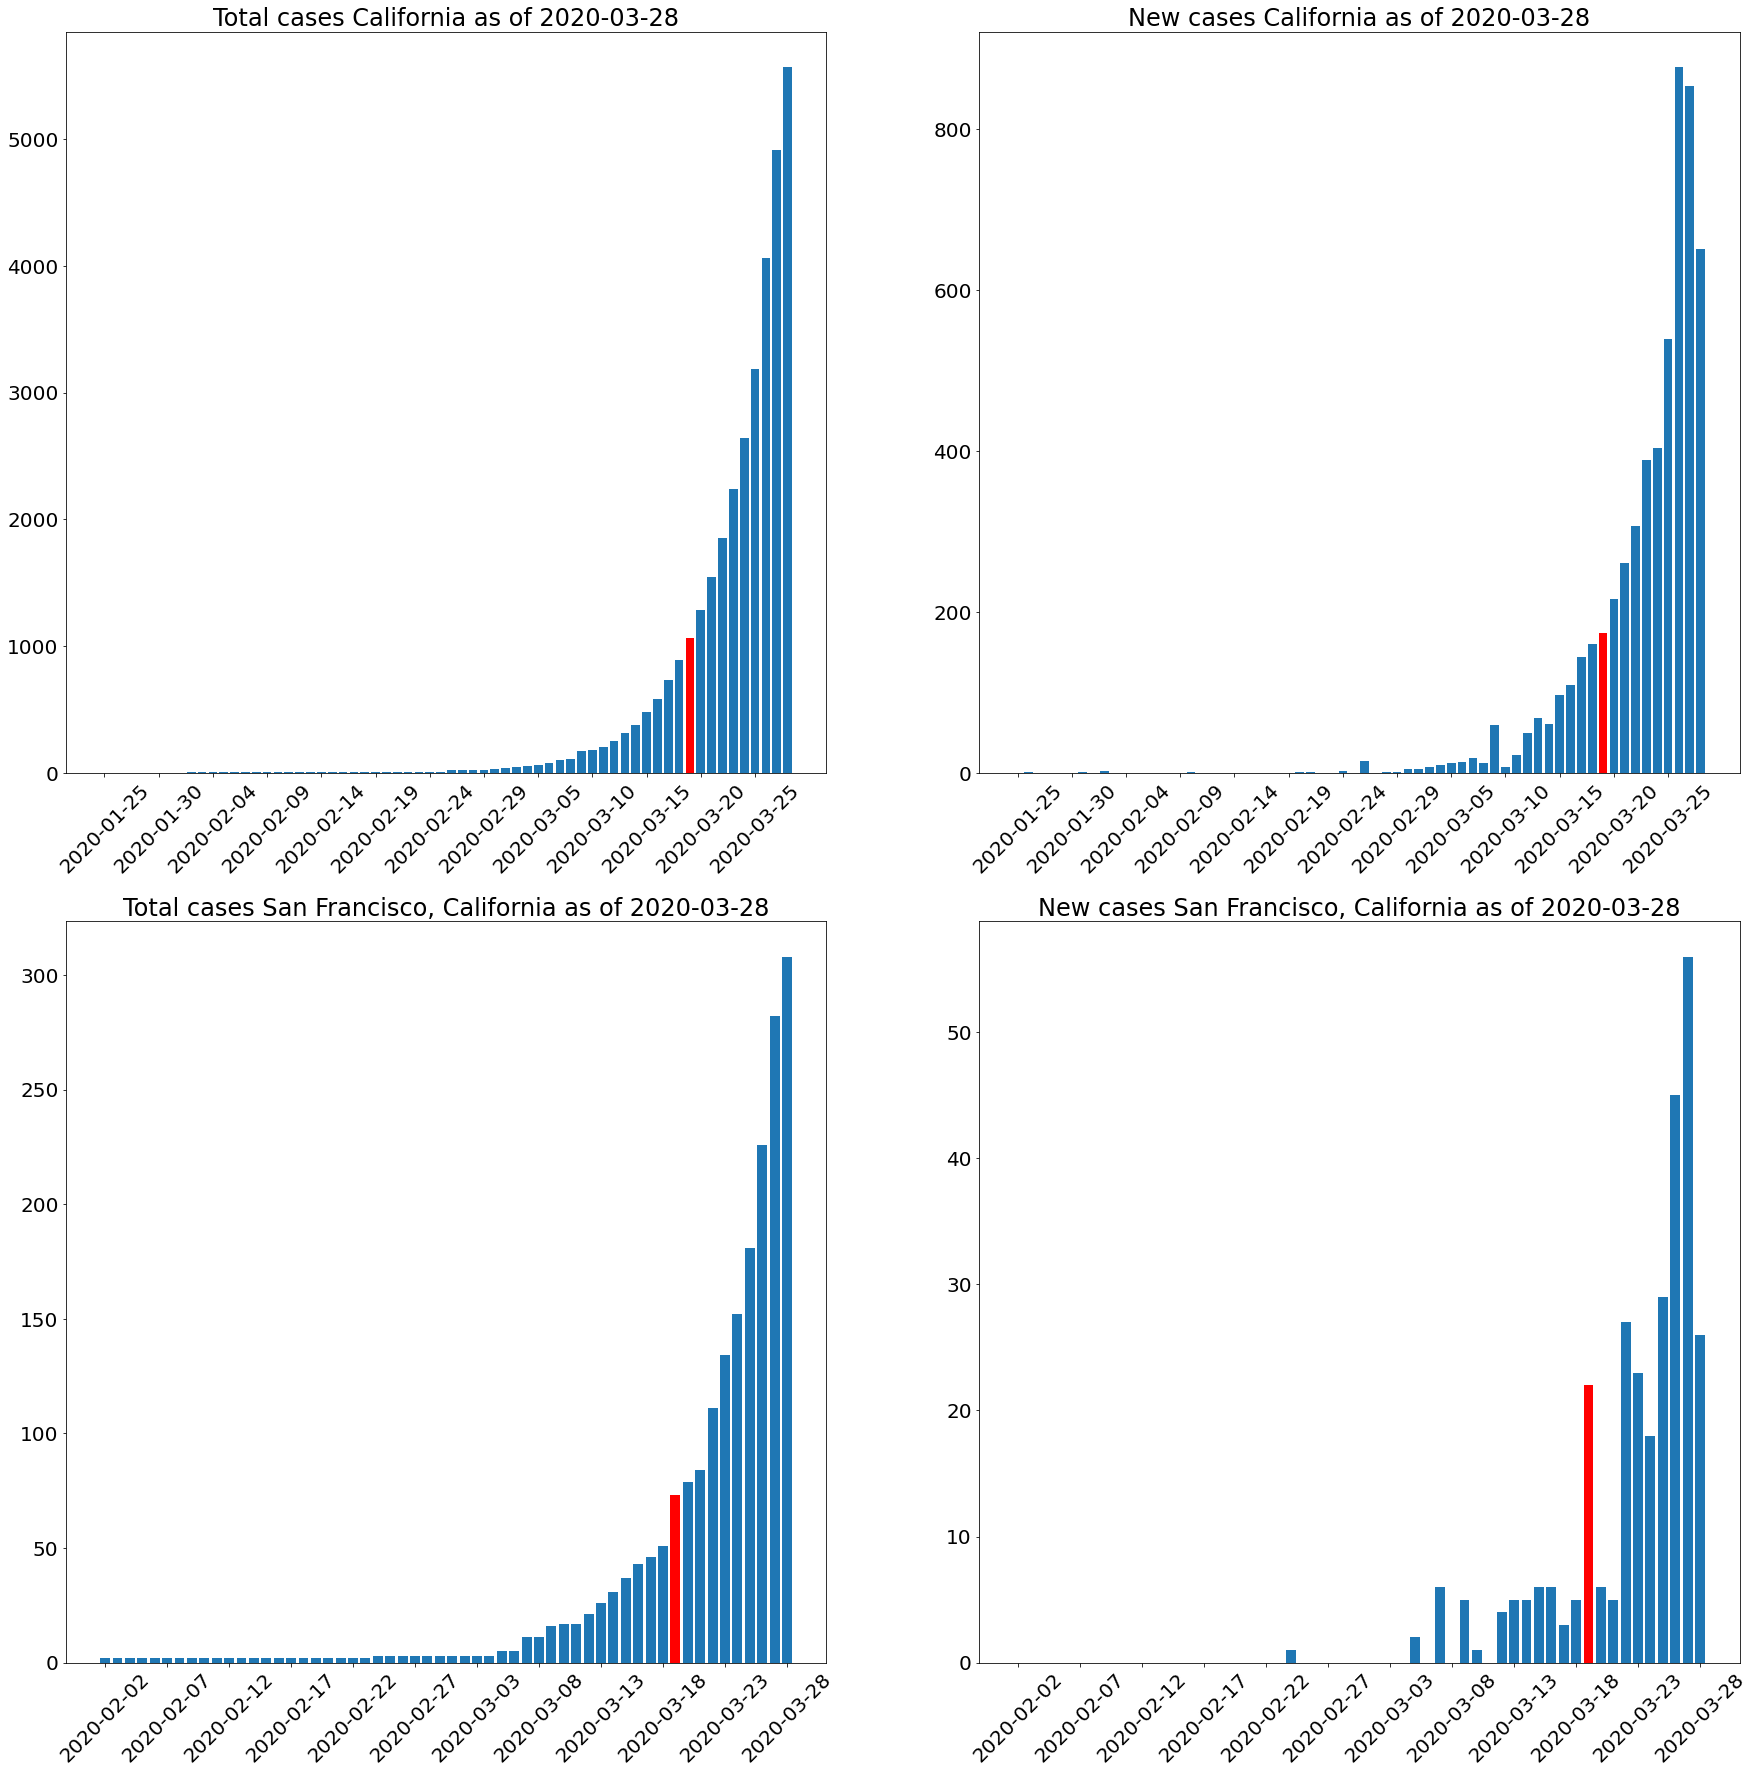

In [447]:
plot_county_and_state('San Francisco', 'California')

<Figure size 432x288 with 0 Axes>

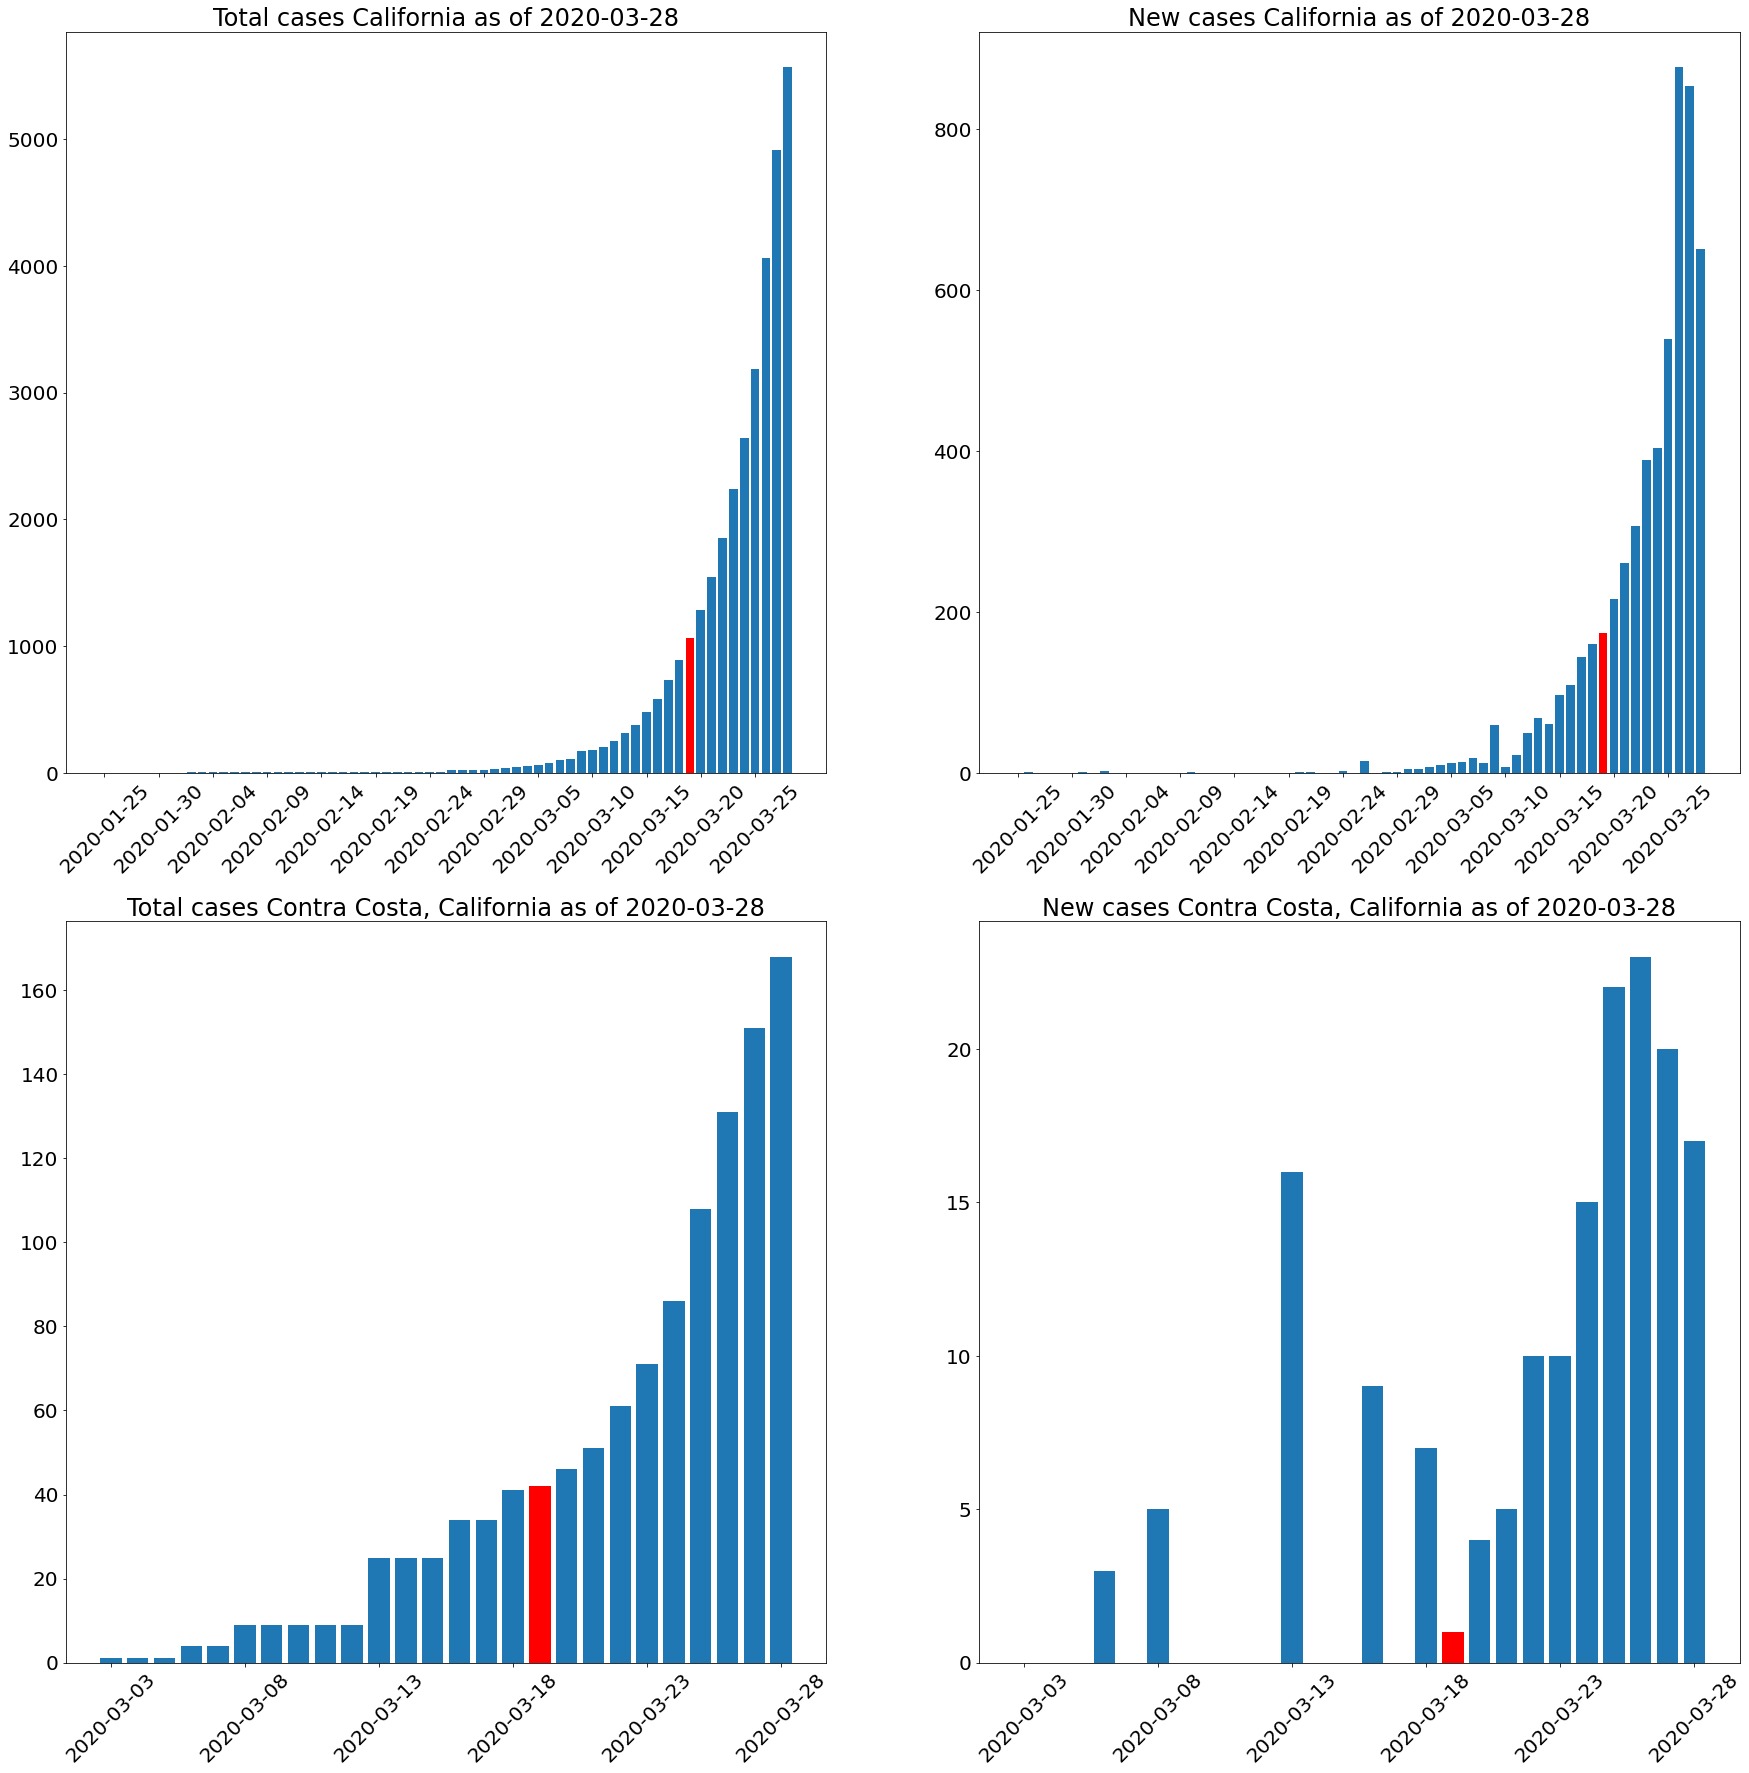

In [449]:
plot_county_and_state('Contra Costa', 'California')

<Figure size 432x288 with 0 Axes>

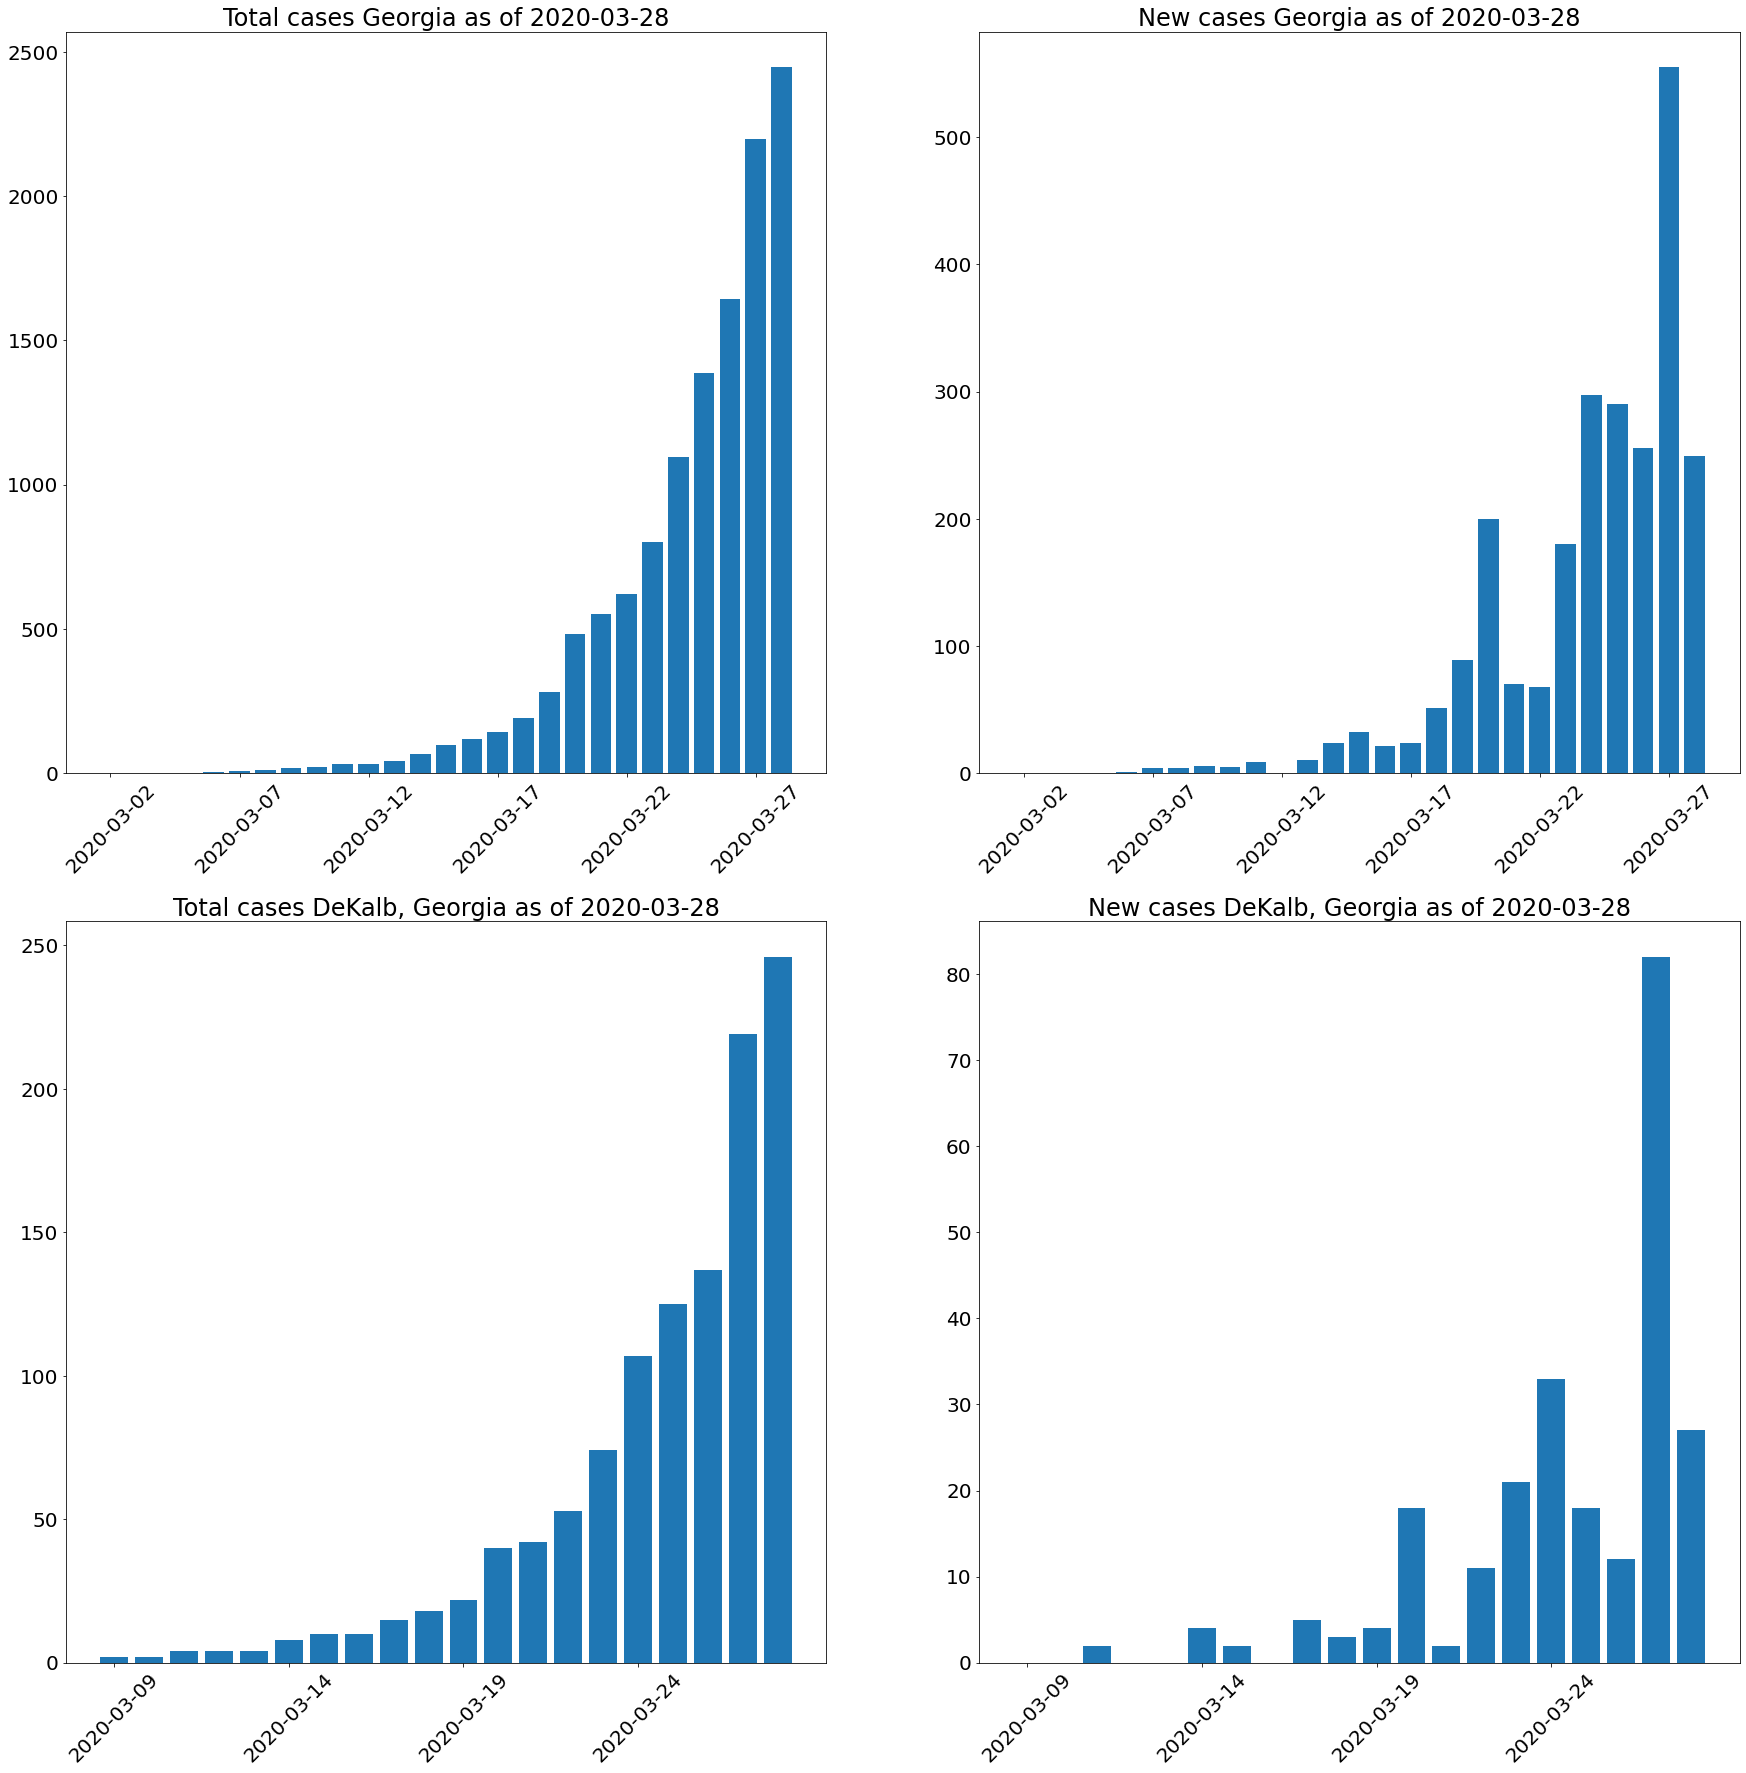

In [450]:
plot_county_and_state('DeKalb', 'Georgia')

<Figure size 432x288 with 0 Axes>

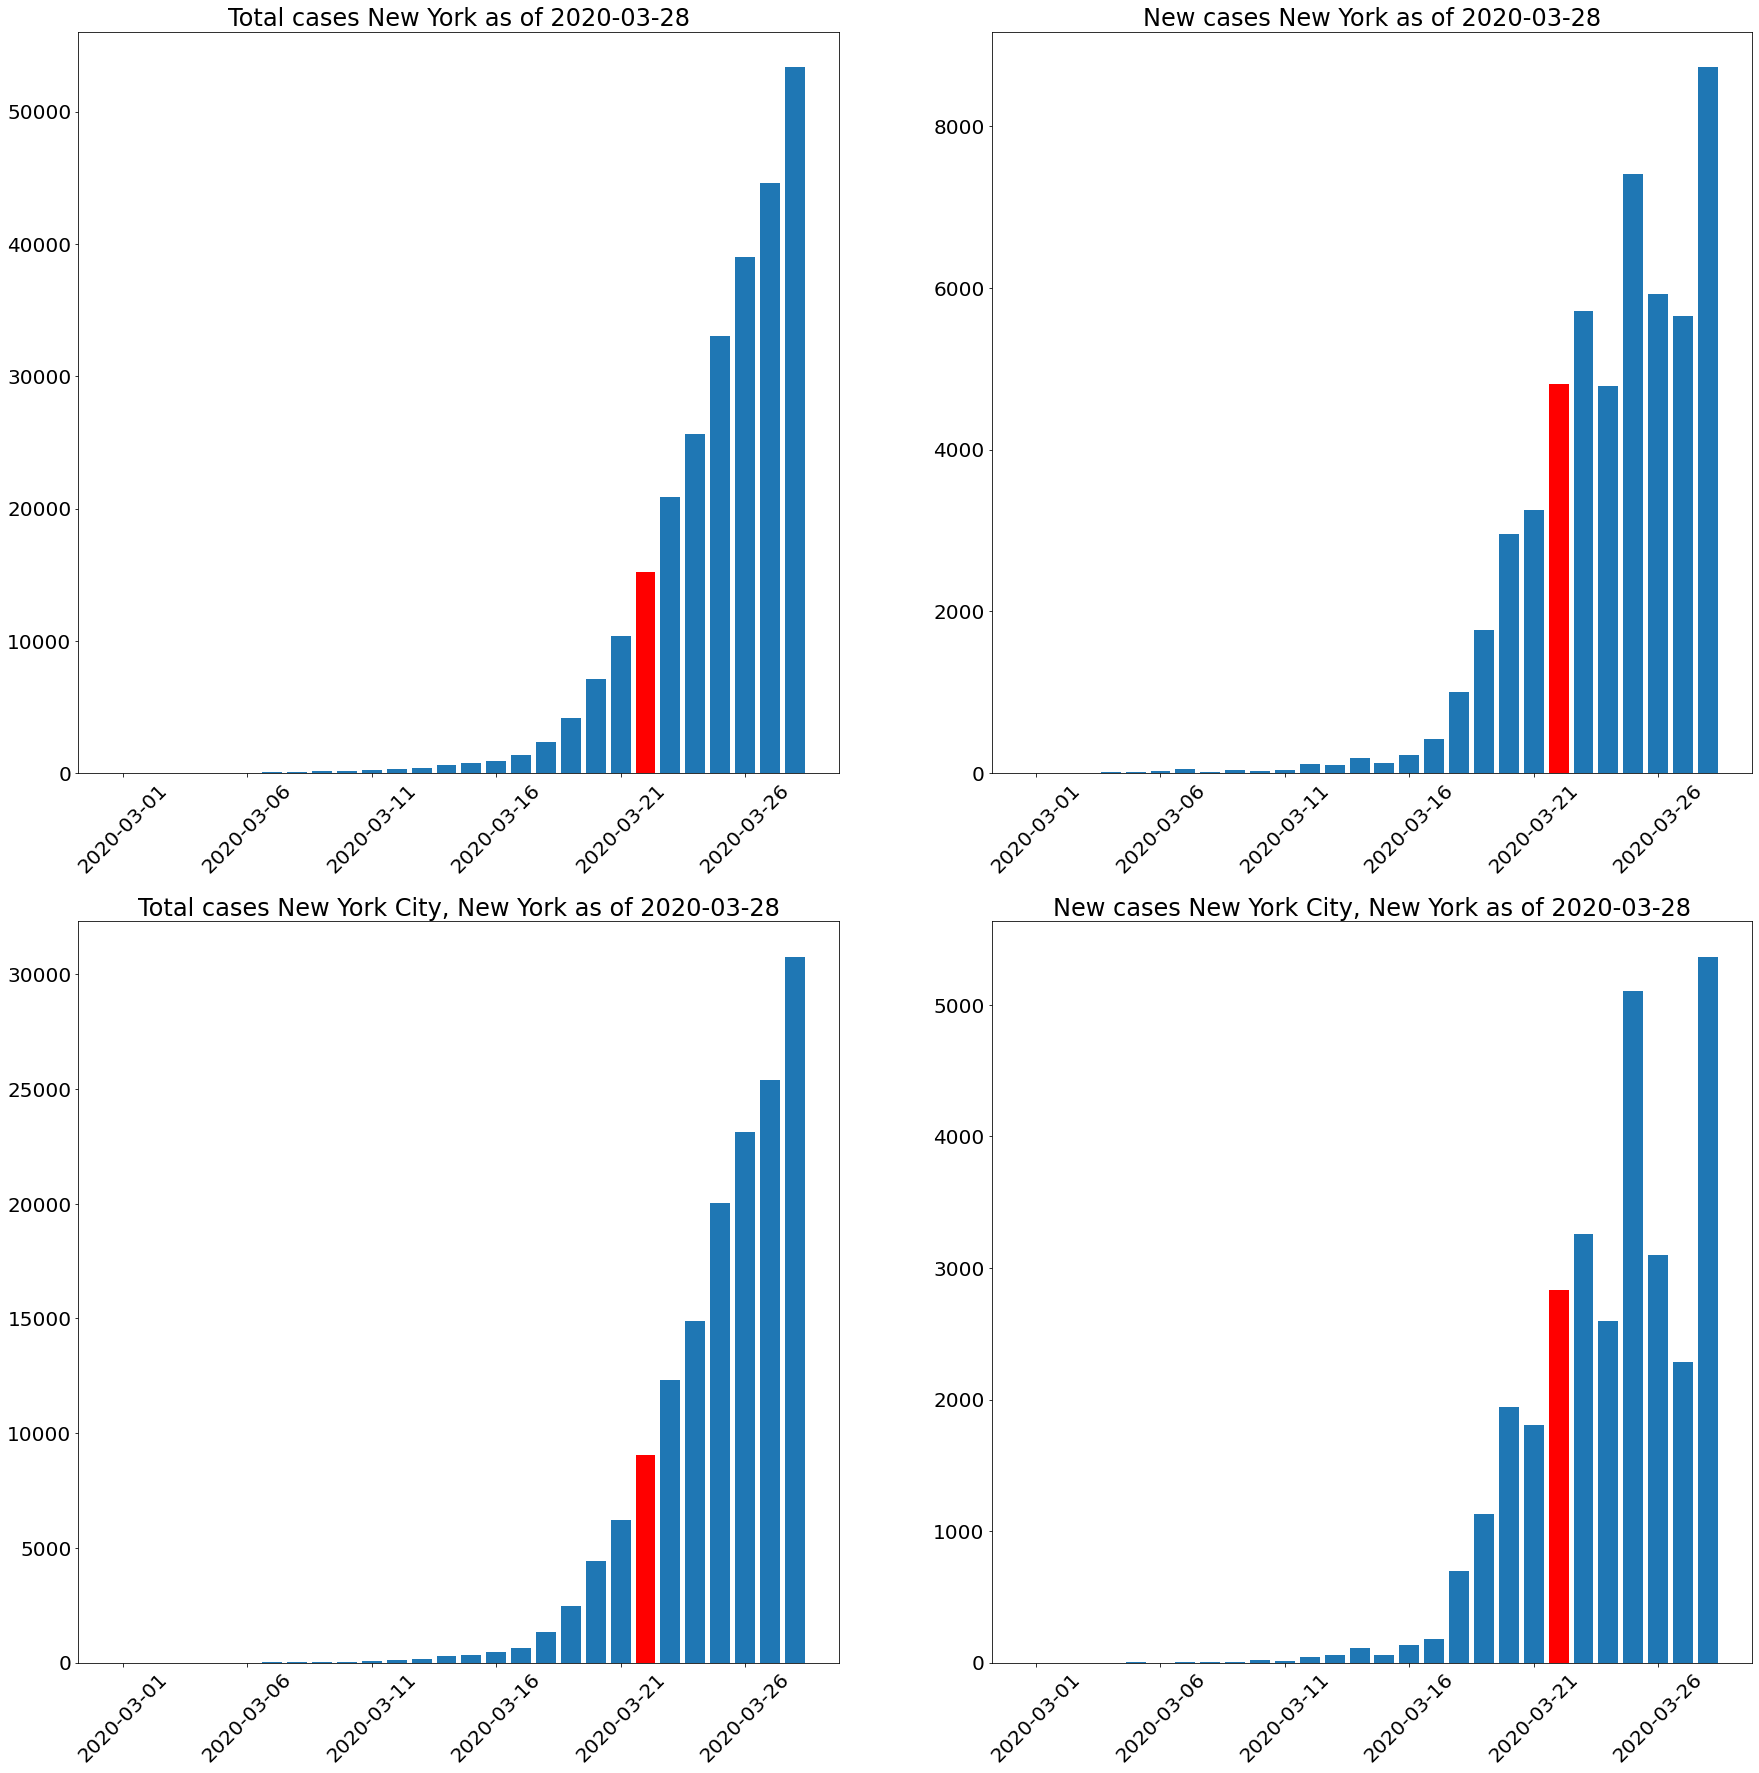

In [451]:
plot_county_and_state('New York City', 'New York')